[[Python] Keras-RLで簡単に強化学習(DQN)を試す](http://qiita.com/inoory/items/e63ade6f21766c7c2393)を参考に、エージェントを作成する。FXの自動取引を行い、利益を出すのが目標。

In [ ]:
import matplotlib as mpl
mpl.use('tkagg')
import numpy as np
import pandas as pd
import talib
from logging import getLogger, StreamHandler, DEBUG, INFO

from hist_data import HistData
from fx_trade import FXTrade
from deep_fx import DeepFX

Using TensorFlow backend.


In [ ]:
logger = getLogger(__name__)
handler = StreamHandler()
#handler.setLevel(INFO)
#logger.setLevel(INFO)
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [ ]:
#import imp
#import sys
#del(hist_data)
#from hist_data import HistData
#del(hist_data)
#imp.reload(hist_data)
#imp.reload(sys.modules[hist_data.__module__])
hd = HistData(csv_path = 'historical_data/DAT_ASCII_USDJPY_M1_201710_m5.csv',
                     begin_date='2017-10-02T00:00:00',
                     end_date='2017-10-02T23:59:59')
                     #end_date='2017-10-09T23:59:59')

header is included


In [ ]:
hd.data()
#len(hist_data.data())

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-02 00:00:00,112.808,112.833,112.805,112.833,0
2017-10-02 00:05:00,112.833,112.834,112.784,112.793,0
2017-10-02 00:10:00,112.793,112.821,112.788,112.812,0
2017-10-02 00:15:00,112.812,112.812,112.790,112.794,0
2017-10-02 00:20:00,112.801,112.805,112.787,112.795,0
2017-10-02 00:25:00,112.795,112.832,112.794,112.826,0
2017-10-02 00:30:00,112.826,112.834,112.820,112.827,0
2017-10-02 00:35:00,112.825,112.851,112.819,112.832,0
2017-10-02 00:40:00,112.836,112.851,112.827,112.841,0


In [ ]:
env = FXTrade(1000000, 0.08, hd, logger=logger)
#env = FXTrade(1000000, 0.08, h, logger=logger)
prepared_model_filename = None #'Keras-RL_DQN_FX_model_meanq1.440944e+06_episode00003.h5'
dfx = DeepFX(env, 'test', prepared_model_filename=prepared_model_filename, episodes = 3)

In [ ]:
is_to_train = True
if is_to_train:
    dfx.train(is_for_time_measurement=True)
else:
    dfx.test(1, [EpisodeLogger()])

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None
17/11/05 18:41:27
Training for 861 steps ...
Training for 861 steps ...
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
Step 00001: model improved
  from 0.000000e+00
    to 0.000000e+00, saving model to ./models/Keras-RL_DQN_FX_model

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833


========== /Model Saver output =============
   6/861: episode: 6, duration: 0.035s, episode steps: 1, steps per second: 29, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
   6/861: episode: 6, duration: 0.036s, episode steps: 1, steps per second: 28, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
   7/861: episode: 7, duration: 0.028s, episode steps: 1, steps per second: 36, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean

_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  13/861: episode: 13, duration: 0.034s, episode steps: 1, steps per second: 29, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  13/861: episode: 13, duration: 0.035s, episode steps: 1, steps per second: 29, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  14/861: episode: 14, duration: 0.024s, episode steps: 1, steps per second: 42, episode rewa

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sel

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  22/861: episode: 21, duration: 0.027s, episode steps: 1, steps per second: 37, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  22/861: episode: 21, duration: 0.027s, episode steps: 1, steps per second: 37, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  23/861: episode: 22, duration: 0.018s, episode steps: 1, steps per second: 54, episode rewa

_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:0

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  32/861: episode: 29, duration: 0.034s, episode steps: 2, steps per second: 60, episode reward: 884792.261, mean reward: 442396.130 [-115207.739, 1000000.000], mean action: 1.500 [1.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: --, mean_q: --
  32/861: episode: 29, duration: 0.034s, episode steps: 2, steps per second: 59, episode reward: 884792.261, mean reward: 442396.130 [-115207.739, 1000000.000], mean action: 1.500 [1.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  33/861: episode: 30, duration: 0.018s, episode steps: 1, steps per second: 57, episode reward: 

2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]

now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  41/861: episode: 38, duration: 0.021s, episode steps: 1, steps per second: 47, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  41/861: episode: 38, duration: 0.022s, episode steps: 1, steps per second: 45, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  42/861: episode: 39, 

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833


mean_q value: 0.000000e+00
========== /Model Saver output =============
  49/861: episode: 46, duration: 0.018s, episode steps: 1, steps per second: 55, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  49/861: episode: 46, duration: 0.019s, episode steps: 1, steps per second: 53, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  50/861: episode: 47, duration: 0.027s, episode steps: 1, steps per second: 37, episode reward: -115598.714, mean reward: -115598.714 [-


  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  58/861: episode: 55, duration: 0.025s, episode steps: 1, steps per second: 39, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  58/861: episode: 55, duration: 0.026s, episode steps: 1, steps per second: 39, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  59/861: episode: 56, duration: 0.022s, episode steps: 1, steps per second: 45, episode rewa

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=イン

now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  68/861: episode: 64, duration: 0.021s, episode steps: 1, steps per second: 47, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  68/861: episode: 64, duration: 0.021s, episode steps: 1, steps per second: 47, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  69/861: episode: 65, 

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step E

========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  78/861: episode: 71, duration: 0.058s, episode steps: 4, steps per second: 69, episode reward: 5116401.947, mean reward: 1279100.487 [-115009.769, 2115603.227], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: --, mean_q: --
  78/861: episode: 71, duration: 0.058s, episode steps: 4, steps per second: 69, episode reward: 5116401.947, mean reward: 1279100.487 [-115009.769, 2115603.227], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  80/861: episode: 72, duration: 0.036s, episode steps: 2, steps per second: 56, episode rewa

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833


mean_q value: 0.000000e+00
========== /Model Saver output =============
  88/861: episode: 78, duration: 0.024s, episode steps: 1, steps per second: 41, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
  88/861: episode: 78, duration: 0.025s, episode steps: 1, steps per second: 41, episode reward: -115598.714, mean reward: -115598.714 [-115598.714, -115598.714], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
  89/861: episode: 79, duration: 0.025s, episode steps: 1, steps per second: 40, episode reward: -115598.714, mean reward: -115598.714 [-

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000004 [2017-10-02 00:20:00]
   after: 000005 [2017-10-02 00:25:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED


now_datetime: 2017-10-02 00:20:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 0.000000e+00
========== /Model Saver output =============
 100/861: episode: 86, duration: 0.072s, episode steps: 5, steps per second: 70, episode reward: 6115162.325, mean reward: 1223032.465 [-115239.093, 2115207.739], mean action: 1.400 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: --, mean_q: --
 100/861: episode: 86, duration: 0.072s, episode steps: 5, steps per second: 69, episode reward: 6115162.325, mean reward: 1223032.465 [-115239.093, 2115207.739], mean action: 1.400 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: --, mean_q: --
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287


_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-0

========== Model Saver output ==============
mean_q value: 5.699454e+01
Step 00102: model improved
  from 0.000000e+00
    to 5.699454e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq5.699454e+01_episode00086
Save model to ./models/Keras-RL_DQN_FX_model_meanq5.699454e+01_episode00086 has done.
max mean_q value: 5.699454e+01
========== /Model Saver output =============
 102/861: episode: 87, duration: 0.295s, episode steps: 2, steps per second: 7, episode reward: 884001.511, mean reward: 442000.756 [-115605.370, 999606.882], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 68350226432.000000, mean_q: 56.994537
 102/861: episode: 87, duration: 0.295s, episode steps: 2, steps per second: 7, episode reward: 884001.511, mean reward: 442000.756 [-115605.370, 999606.882], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 68350226432.000000, mean_q: 56.994537
_reset START
self._seed: 100000
Start datetime: 2017-10-02

positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STA

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 5.635769e+01
========== /Model Saver output =============
 112/861: episode: 92, duration: 0.050s, episode steps: 2, steps per second: 40, episode reward: 884001.511, mean reward: 442000.756 [-115605.370, 999606.882], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 211435765760.000000, mean_q: 56.357689
 112/861: episode: 92, duration: 0.053s, episode steps: 2, steps per second: 38, episode reward: 884001.511, mean reward: 442000.756 [-115605.370, 999606.882], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 211435765760.000000, mean_q: 56.357689
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 5.651011e+01
========== /Model Saver ou

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step

========== /Model Saver output =============
 118/861: episode: 95, duration: 0.057s, episode steps: 2, steps per second: 35, episode reward: 884001.511, mean reward: 442000.756 [-115605.370, 999606.882], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 250285359104.000000, mean_q: 56.949532
 118/861: episode: 95, duration: 0.058s, episode steps: 2, steps per second: 34, episode reward: 884001.511, mean reward: 442000.756 [-115605.370, 999606.882], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 250285359104.000000, mean_q: 56.949532
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 5.715668e+01
Step 00120: model improved
  from 5.699454e+01
    to 5.715668e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq5.715668e+01_episode00095
Save model to ./models

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)

now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 5.805420e+01
Step 00128: model improved
  from 5.752280e+01
    to 5.805420e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq5.805420e+01_episode00097
Save model to ./models/Keras-RL_DQN_FX_model_meanq5.805420e+01_episode00097 has done.
max mean_q value: 5.805420e+01
========== /Model Saver output =============
 128/861: episode: 98, duration: 0.096s, episode steps: 3, steps per second: 31, episode reward: 2999816.658, mean reward: 999938.886 [-115391.309, 2115210.109], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 186948960256.000000, mean_q: 58.054199
 128/861: episode: 98, duration: 0.098s, episode steps: 3, steps per second: 31, episode reward: 2999816.658, mean reward: 999938.886 [-115391.309, 2115210.109], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 186948960256.000000

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2

========== Model Saver output ==============
mean_q value: 5.895657e+01
Step 00134: model improved
  from 5.848271e+01
    to 5.895657e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq5.895657e+01_episode00099
Save model to ./models/Keras-RL_DQN_FX_model_meanq5.895657e+01_episode00099 has done.
max mean_q value: 5.895657e+01
========== /Model Saver output =============
 134/861: episode: 100, duration: 0.095s, episode steps: 3, steps per second: 32, episode reward: 2999816.658, mean reward: 999938.886 [-115391.309, 2115210.109], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 235895390208.000000, mean_q: 58.956573
 134/861: episode: 100, duration: 0.095s, episode steps: 3, steps per second: 31, episode reward: 2999816.658, mean reward: 999938.886 [-115391.309, 2115210.109], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 235895390208.000000, mean_q: 58.956573
_reset START
self._seed: 100000
Start datetime: 

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2


mean_q value: 6.017599e+01
Step 00142: model improved
  from 5.952563e+01
    to 6.017599e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.017599e+01_episode00101
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.017599e+01_episode00101 has done.
max mean_q value: 6.017599e+01
========== /Model Saver output =============
 142/861: episode: 102, duration: 0.109s, episode steps: 5, steps per second: 46, episode reward: 8345016.943, mean reward: 1669003.389 [-115426.724, 3230413.335], mean action: 1.800 [1.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 435487965184.000000, mean_q: 60.175995
 142/861: episode: 102, duration: 0.110s, episode steps: 5, steps per second: 45, episode reward: 8345016.943, mean reward: 1669003.389 [-115426.724, 3230413.335], mean action: 1.800 [1.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 435487965184.000000, mean_q: 60.175995
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetim

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED



max mean_q value: 6.145737e+01
========== /Model Saver output =============
 149/861: episode: 104, duration: 0.112s, episode steps: 4, steps per second: 36, episode reward: 3999994.740, mean reward: 999998.685 [-115215.370, 2115210.109], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 407140106240.000000, mean_q: 61.457371
 149/861: episode: 104, duration: 0.112s, episode steps: 4, steps per second: 36, episode reward: 3999994.740, mean reward: 999998.685 [-115215.370, 2115210.109], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 407140106240.000000, mean_q: 61.457371
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 6.199744e+01
Step 00150: model improved
  from 6.145737e+01
    to 6.199744e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.199744e+

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED


Save model to ./models/Keras-RL_DQN_FX_model_meanq6.262131e+01_episode00107 has done.
max mean_q value: 6.262131e+01
========== /Model Saver output =============
 153/861: episode: 108, duration: 0.054s, episode steps: 1, steps per second: 19, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 727159406592.000000, mean_q: 62.621311
 153/861: episode: 108, duration: 0.054s, episode steps: 1, steps per second: 18, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 727159406592.000000, mean_q: 62.621311
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 6.285755e+01
Step 00154: model improved
  from 6.262131e

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833

========== Model Saver output ==============
mean_q value: 6.369810e+01
Step 00157: model improved
  from 6.355090e+01
    to 6.369810e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.369810e+01_episode00111
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.369810e+01_episode00111 has done.
max mean_q value: 6.369810e+01
========== /Model Saver output =============
 157/861: episode: 112, duration: 0.050s, episode steps: 1, steps per second: 20, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 246650273792.000000, mean_q: 63.698105
 157/861: episode: 112, duration: 0.051s, episode steps: 1, steps per second: 20, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 246650273792.000000, mean_q: 63.698105
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833

========== Model Saver output ==============
mean_q value: 6.509642e+01
Step 00162: model improved
  from 6.469756e+01
    to 6.509642e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.509642e+01_episode00116
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.509642e+01_episode00116 has done.
max mean_q value: 6.509642e+01
========== /Model Saver output =============
 162/861: episode: 117, duration: 0.055s, episode steps: 1, steps per second: 18, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 766105812992.000000, mean_q: 65.096420
 162/861: episode: 117, duration: 0.057s, episode steps: 1, steps per second: 18, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 766105812992.000000, mean_q: 65.096420
_reset START
self._seed: 100000
Start datetime

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
p

========== Model Saver output ==============
mean_q value: 6.635149e+01
Step 00167: model improved
  from 6.602887e+01
    to 6.635149e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.635149e+01_episode00121
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.635149e+01_episode00121 has done.
max mean_q value: 6.635149e+01
========== /Model Saver output =============
 167/861: episode: 122, duration: 0.035s, episode steps: 1, steps per second: 28, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 401464360960.000000, mean_q: 66.351486
 167/861: episode: 122, duration: 0.036s, episode steps: 1, steps per second: 28, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 401464360960.000000, mean_q: 66.351486
_reset START
self._seed: 100000
Start datetime

_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED


========== Model Saver output ==============
mean_q value: 6.758797e+01
Step 00172: model improved
  from 6.734232e+01
    to 6.758797e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.758797e+01_episode00126
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.758797e+01_episode00126 has done.
max mean_q value: 6.758797e+01
========== /Model Saver output =============
 172/861: episode: 127, duration: 0.039s, episode steps: 1, steps per second: 26, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 292859215872.000000, mean_q: 67.587967
 172/861: episode: 127, duration: 0.040s, episode steps: 1, steps per second: 25, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 292859215872.000000, mean_q: 67.587967
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED


========== Model Saver output ==============
mean_q value: 6.841440e+01
Step 00176: model improved
  from 6.827338e+01
    to 6.841440e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.841440e+01_episode00130
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.841440e+01_episode00130 has done.
max mean_q value: 6.841440e+01
========== /Model Saver output =============
 176/861: episode: 131, duration: 0.052s, episode steps: 1, steps per second: 19, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 455747043328.000000, mean_q: 68.414398
 176/861: episode: 131, duration: 0.053s, episode steps: 1, steps per second: 19, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 455747043328.000000, mean_q: 68.414398
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED


========== Model Saver output ==============
mean_q value: 6.919585e+01
Step 00180: model improved
  from 6.904268e+01
    to 6.919585e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq6.919585e+01_episode00134
Save model to ./models/Keras-RL_DQN_FX_model_meanq6.919585e+01_episode00134 has done.
max mean_q value: 6.919585e+01
========== /Model Saver output =============
 180/861: episode: 135, duration: 0.043s, episode steps: 1, steps per second: 23, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 292881858560.000000, mean_q: 69.195847
 180/861: episode: 135, duration: 0.044s, episode steps: 1, steps per second: 23, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 292881858560.000000, mean_q: 69.195847
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED


Save model to ./models/Keras-RL_DQN_FX_model_meanq6.992271e+01_episode00138 has done.
max mean_q value: 6.992271e+01
========== /Model Saver output =============
 184/861: episode: 139, duration: 0.048s, episode steps: 1, steps per second: 21, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 448393314304.000000, mean_q: 69.922714
 184/861: episode: 139, duration: 0.049s, episode steps: 1, steps per second: 20, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 448393314304.000000, mean_q: 69.922714
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 7.006197e+01
Step 00185: model improved
  from 6.992271e

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833

========== Model Saver output ==============
mean_q value: 7.058569e+01
Step 00188: model improved
  from 7.036446e+01
    to 7.058569e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.058569e+01_episode00142
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.058569e+01_episode00142 has done.
max mean_q value: 7.058569e+01
========== /Model Saver output =============
 188/861: episode: 143, duration: 0.047s, episode steps: 1, steps per second: 21, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 432257892352.000000, mean_q: 70.585686
 188/861: episode: 143, duration: 0.048s, episode steps: 1, steps per second: 21, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 432257892352.000000, mean_q: 70.585686
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833

========== Model Saver output ==============
mean_q value: 7.156082e+01
Step 00193: model improved
  from 7.133385e+01
    to 7.156082e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.156082e+01_episode00147
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.156082e+01_episode00147 has done.
max mean_q value: 7.156082e+01
========== /Model Saver output =============
 193/861: episode: 148, duration: 0.040s, episode steps: 1, steps per second: 25, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 595102138368.000000, mean_q: 71.560822
 193/861: episode: 148, duration: 0.041s, episode steps: 1, steps per second: 24, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 595102138368.000000, mean_q: 71.560822
_reset START
self._seed: 100000
Start datetime

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
p

========== Model Saver output ==============
mean_q value: 7.261087e+01
Step 00198: model improved
  from 7.244812e+01
    to 7.261087e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.261087e+01_episode00152
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.261087e+01_episode00152 has done.
max mean_q value: 7.261087e+01
========== /Model Saver output =============
 198/861: episode: 153, duration: 0.051s, episode steps: 1, steps per second: 20, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 324317282304.000000, mean_q: 72.610870
 198/861: episode: 153, duration: 0.051s, episode steps: 1, steps per second: 19, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 324317282304.000000, mean_q: 72.610870
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_st

========== Model Saver output ==============
mean_q value: 7.351629e+01
Step 00203: model improved
  from 7.339561e+01
    to 7.351629e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.351629e+01_episode00157
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.351629e+01_episode00157 has done.
max mean_q value: 7.351629e+01
========== /Model Saver output =============
 203/861: episode: 158, duration: 0.036s, episode steps: 1, steps per second: 28, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 370556403712.000000, mean_q: 73.516289
 203/861: episode: 158, duration: 0.038s, episode steps: 1, steps per second: 26, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 370556403712.000000, mean_q: 73.516289
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [201

now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 7.449516e+01
Step 00210: model improved
  from 7.440234e+01
    to 7.449516e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.449516e+01_episode00162
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.449516e+01_episode00162 has done.
max mean_q value: 7.449516e+01
========== /Model Saver output =============
 210/861: episode: 163, duration: 0.044s, episode steps: 1, steps per second: 23, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 168864579584.000000, mean_q: 74.495163
 210/861: episode: 163, duration: 0.045s, episode steps: 1, steps per second: 22, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 168864579584.00

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step E

Save model to ./models/Keras-RL_DQN_FX_model_meanq7.506126e+01_episode00165 has done.
max mean_q value: 7.506126e+01
========== /Model Saver output =============
 216/861: episode: 166, duration: 0.096s, episode steps: 4, steps per second: 41, episode reward: 5116410.522, mean reward: 1279102.631 [-115007.626, 2115605.371], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 256348504064.000000, mean_q: 75.061264
 216/861: episode: 166, duration: 0.097s, episode steps: 4, steps per second: 41, episode reward: 5116410.522, mean reward: 1279102.631 [-115007.626, 2115605.371], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 256348504064.000000, mean_q: 75.061264
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 7.529579e+01
Step 00218: model improved
  from 7.506126e

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=イン

now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 7.582547e+01
Step 00223: model improved
  from 7.571706e+01
    to 7.582547e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.582547e+01_episode00169
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.582547e+01_episode00169 has done.
max mean_q value: 7.582547e+01
========== /Model Saver output =============
 223/861: episode: 170, duration: 0.059s, episode steps: 1, steps per second: 17, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 440298012672.000000, mean_q: 75.825470
 223/861: episode: 170, duration: 0.061s, episode steps: 1, steps per second: 16, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 440298012672.00

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのイン

========== Model Saver output ==============
mean_q value: 7.648959e+01
Step 00227: model improved
  from 7.636098e+01
    to 7.648959e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.648959e+01_episode00173
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.648959e+01_episode00173 has done.
max mean_q value: 7.648959e+01
========== /Model Saver output =============
 227/861: episode: 174, duration: 0.048s, episode steps: 1, steps per second: 21, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 199701004288.000000, mean_q: 76.489594
 227/861: episode: 174, duration: 0.049s, episode steps: 1, steps per second: 21, episode reward: -115596.570, mean reward: -115596.570 [-115596.570, -115596.570], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 199701004288.000000, mean_q: 76.489594
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-0

Save model to ./models/Keras-RL_DQN_FX_model_meanq7.712569e+01_episode00175 has done.
max mean_q value: 7.712569e+01
========== /Model Saver output =============
 233/861: episode: 176, duration: 0.071s, episode steps: 2, steps per second: 28, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 188338913280.000000, mean_q: 77.125687
 233/861: episode: 176, duration: 0.072s, episode steps: 2, steps per second: 28, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 188338913280.000000, mean_q: 77.125687
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 7.734241e+01
Step 00235: model improved
  from 7.712569e+01


   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している

========== Model Saver output ==============
mean_q value: 7.797006e+01
Step 00239: model improved
  from 7.768044e+01
    to 7.797006e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.797006e+01_episode00178
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.797006e+01_episode00178 has done.
max mean_q value: 7.797006e+01
========== /Model Saver output =============
 239/861: episode: 179, duration: 0.076s, episode steps: 2, steps per second: 26, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 568010342400.000000, mean_q: 77.970062
 239/861: episode: 179, duration: 0.077s, episode steps: 2, steps per second: 26, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 568010342400.000000, mean_q: 77.970062
_reset START
self._seed: 100000
Start datetime: 20

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  befor

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 7.900313e+01
Step 00245: model improved
  from 7.869034e+01
    to 7.900313e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.900313e+01_episode00181
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.900313e+01_episode00181 has done.
max mean_q value: 7.900313e+01
========== /Model Saver output =============
 245/861: episode: 182, duration: 0.070s, episode steps: 2, steps per second: 28, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 176566304768.000000, mean_q: 79.003128
 245/861: episode: 182, duration: 0.071s, episode steps: 2, steps per second: 28, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 176566304768.000000

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 7.981705e+01
Step 00251: model improved
  from 7.959308e+01
    to 7.981705e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq7.981705e+01_episode00184
Save model to ./models/Keras-RL_DQN_FX_model_meanq7.981705e+01_episode00184 has done.
max mean_q value: 7.981705e+01
========== /Model Saver output =============
 251/861: episode: 185, duration: 0.077s, episode steps: 2, steps per second: 26, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 366625292288.000000, mean_q: 79.817047
 251/861: episode: 185, duration: 0.078s, episode steps: 2, steps per second: 26, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 366625292288.000000

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-0

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 8.070277e+01
Step 00257: model improved
  from 8.041638e+01
    to 8.070277e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.070277e+01_episode00187
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.070277e+01_episode00187 has done.
max mean_q value: 8.070277e+01
========== /Model Saver output =============
 257/861: episode: 188, duration: 0.092s, episode steps: 2, steps per second: 22, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 242279317504.000000, mean_q: 80.702774
 257/861: episode: 188, duration: 0.093s, episode steps: 2, steps per second: 22, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 242279317504.000000

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 8.154935e+01
Step 00263: model improved
  from 8.127004e+01
    to 8.154935e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.154935e+01_episode00190
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.154935e+01_episode00190 has done.
max mean_q value: 8.154935e+01
========== /Model Saver output =============
 263/861: episode: 191, duration: 0.067s, episode steps: 2, steps per second: 30, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 377984253952.000000, mean_q: 81.549355
 263/861: episode: 191, duration: 0.069s, episode steps: 2, steps per second: 29, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 377984253952.000000

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 8.259186e+01
Step 00269: model improved
  from 8.224956e+01
    to 8.259186e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.259186e+01_episode00193
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.259186e+01_episode00193 has done.
max mean_q value: 8.259186e+01
========== /Model Saver output =============
 269/861: episode: 194, duration: 0.066s, episode steps: 2, steps per second: 30, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 424241397760.000000, mean_q: 82.591858
 269/861: episode: 194, duration: 0.067s, episode steps: 2, steps per second: 30, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 424241397760.000000

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_s

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 8.381149e+01
Step 00275: model improved
  from 8.337227e+01
    to 8.381149e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.381149e+01_episode00196
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.381149e+01_episode00196 has done.
max mean_q value: 8.381149e+01
========== /Model Saver output =============
 275/861: episode: 197, duration: 0.076s, episode steps: 2, steps per second: 26, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 358542475264.000000, mean_q: 83.811485
 275/861: episode: 197, duration: 0.077s, episode steps: 2, steps per second: 26, episode reward: 884801.062, mean reward: 442400.531 [-115205.595, 1000006.657], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 358542475264.000000

_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000004 [2017-10-02 00:20:00]
   after: 000005 [2017-10-02 00:25:00]
_step ENDED
_step 000005 STARTED
現在の総含み益を再計算
buy_or_sell: 1
pos

_step ENDED
_step 000009 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000009 [2017-10-02 00:45:00]
   after: 000010 [2017-10-02 00:50:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   afte

now_datetime: 2017-10-02 00:45:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 8.563936e+01
Step 00289: model improved
  from 8.468994e+01
    to 8.563936e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.563936e+01_episode00199
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.563936e+01_episode00199 has done.
max mean_q value: 8.563936e+01
========== /Model Saver output =============
 289/861: episode: 200, duration: 0.252s, episode steps: 10, steps per second: 40, episode reward: 22268605.000, mean reward: 2226860.500 [-115967.770, 3230830.742], mean action: 1.500 [0.000, 2.000], mean observation: 59.158 [1.000, 112.841], loss: 474988576768.000000, mean_q: 85.639359
 289/861: episode: 200, duration: 0.252s, episode steps: 10, steps per second: 40, episode reward: 22268605.000, mean reward: 2226860.500 [-115967.770, 3230830.742], mean action: 1.500 [0.000, 2.000], mean observation: 59.158 [1.000, 112.841], loss: 47498857676

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 

now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 8.718947e+01
Step 00296: model improved
  from 8.662347e+01
    to 8.718947e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.718947e+01_episode00201
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.718947e+01_episode00201 has done.
max mean_q value: 8.718947e+01
========== /Model Saver output =============
 296/861: episode: 202, duration: 0.120s, episode steps: 4, steps per second: 33, episode reward: 4000003.316, mean reward: 1000000.829 [-115213.226, 2115212.253], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 498356158464.000000, mean_q: 87.189468
 296/861: episode: 202, duration: 0.122s, episode steps: 4, steps per second: 33, episode reward: 4000003.316, mean reward: 1000000.829 [-115213.226, 2115212.253], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 498356158464.00

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算


========== Model Saver output ==============
mean_q value: 8.842729e+01
Step 00300: model improved
  from 8.812294e+01
    to 8.842729e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.842729e+01_episode00205
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.842729e+01_episode00205 has done.
max mean_q value: 8.842729e+01
========== /Model Saver output =============
 300/861: episode: 206, duration: 0.045s, episode steps: 1, steps per second: 22, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 207771172864.000000, mean_q: 88.427292
 300/861: episode: 206, duration: 0.046s, episode steps: 1, steps per second: 22, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 207771172864.000000, mean_q: 88.427292
_reset START
self._seed: 100000
Start datetime

buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 

now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 8.974744e+01
Step 00305: model improved
  from 8.948528e+01
    to 8.974744e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq8.974744e+01_episode00210
Save model to ./models/Keras-RL_DQN_FX_model_meanq8.974744e+01_episode00210 has done.
max mean_q value: 8.974744e+01
========== /Model Saver output =============
 305/861: episode: 211, duration: 0.040s, episode steps: 1, steps per second: 25, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 261337710592.000000, mean_q: 89.747437
 305/861: episode: 211, duration: 0.041s, episode steps: 1, steps per second: 25, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 261337710592.00

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833

 309/861: episode: 214, duration: 0.052s, episode steps: 1, steps per second: 19, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 168834957312.000000, mean_q: 90.673981
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 9.091590e+01
Step 00310: model improved
  from 9.067398e+01
    to 9.091590e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.091590e+01_episode00214
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.091590e+01_episode00214 has done.
max mean_q value: 9.091590e+01
========== /Model Saver output =============
 310/861: episode: 215, duration: 0.045s, episode steps: 1, steps per second: 22, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000

========== Model Saver output ==============
mean_q value: 9.202467e+01
Step 00314: model improved
  from 9.174728e+01
    to 9.202467e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.202467e+01_episode00218
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.202467e+01_episode00218 has done.
max mean_q value: 9.202467e+01
========== /Model Saver output =============
 314/861: episode: 219, duration: 0.041s, episode steps: 1, steps per second: 24, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 223147114496.000000, mean_q: 92.024673
 314/861: episode: 219, duration: 0.042s, episode steps: 1, steps per second: 24, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 223147114496.000000, mean_q: 92.024673
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-0


 320/861: episode: 222, duration: 0.112s, episode steps: 4, steps per second: 36, episode reward: 5116419.098, mean reward: 1279104.774 [-115005.482, 2115607.515], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 230689767424.000000, mean_q: 93.013893
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 9.345810e+01
Step 00322: model improved
  from 9.301389e+01
    to 9.345810e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.345810e+01_episode00222
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.345810e+01_episode00222 has done.
max mean_q value: 9.345810e+01
========== /Model Saver output =============
 322/861: episode: 223, duration: 0.063s, episode steps: 2, steps per second: 32, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-0

========== Model Saver output ==============
mean_q value: 9.407842e+01
Step 00326: model improved
  from 9.376867e+01
    to 9.407842e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.407842e+01_episode00224
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.407842e+01_episode00224 has done.
max mean_q value: 9.407842e+01
========== /Model Saver output =============
 326/861: episode: 225, duration: 0.078s, episode steps: 2, steps per second: 25, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 447668256768.000000, mean_q: 94.078423
 326/861: episode: 225, duration: 0.079s, episode steps: 2, steps per second: 25, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 447668256768.000000, mean_q: 94.078423
_reset START
self._seed: 100000
Start datetime: 20

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 00000

Save model to ./models/Keras-RL_DQN_FX_model_meanq9.502180e+01_episode00227 has done.
max mean_q value: 9.502180e+01
========== /Model Saver output =============
 332/861: episode: 228, duration: 0.068s, episode steps: 2, steps per second: 29, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 373968273408.000000, mean_q: 95.021797
 332/861: episode: 228, duration: 0.069s, episode steps: 2, steps per second: 29, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 373968273408.000000, mean_q: 95.021797
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 9.541800e+01
Step 00335: model improved
  from 9.502180e+01


_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833

now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 9.623418e+01
Step 00338: model improved
  from 9.602386e+01
    to 9.623418e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.623418e+01_episode00231
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.623418e+01_episode00231 has done.
max mean_q value: 9.623418e+01
========== /Model Saver output =============
 338/861: episode: 232, duration: 0.042s, episode steps: 1, steps per second: 24, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 223192154112.000000, mean_q: 96.234184
 338/861: episode: 232, duration: 0.043s, episode steps: 1, steps per second: 23, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 223192154112.00

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833


mean_q value: 9.705230e+01
Step 00342: model improved
  from 9.686406e+01
    to 9.705230e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.705230e+01_episode00235
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.705230e+01_episode00235 has done.
max mean_q value: 9.705230e+01
========== /Model Saver output =============
 342/861: episode: 236, duration: 0.047s, episode steps: 1, steps per second: 21, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 99192823808.000000, mean_q: 97.052299
 342/861: episode: 236, duration: 0.048s, episode steps: 1, steps per second: 21, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 99192823808.000000, mean_q: 97.052299
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime:

_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:0

========== Model Saver output ==============
mean_q value: 9.801169e+01
Step 00347: model improved
  from 9.782614e+01
    to 9.801169e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.801169e+01_episode00240
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.801169e+01_episode00240 has done.
max mean_q value: 9.801169e+01
========== /Model Saver output =============
 347/861: episode: 241, duration: 0.041s, episode steps: 1, steps per second: 24, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 610511028224.000000, mean_q: 98.011688
 347/861: episode: 241, duration: 0.042s, episode steps: 1, steps per second: 24, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 610511028224.000000, mean_q: 98.011688
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED


========== Model Saver output ==============
mean_q value: 9.924347e+01
Step 00352: model improved
  from 9.900262e+01
    to 9.924347e+01, saving model to ./models/Keras-RL_DQN_FX_model_meanq9.924347e+01_episode00245
Save model to ./models/Keras-RL_DQN_FX_model_meanq9.924347e+01_episode00245 has done.
max mean_q value: 9.924347e+01
========== /Model Saver output =============
 352/861: episode: 246, duration: 0.043s, episode steps: 1, steps per second: 24, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 664901124096.000000, mean_q: 99.243469
 352/861: episode: 246, duration: 0.043s, episode steps: 1, steps per second: 23, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 664901124096.000000, mean_q: 99.243469
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833

_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.005582e+02
Step 00357: model improved
  from 1.003298e+02
    to 1.005582e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.005582e+02_episode00250
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.005582e+02_episode00250 has done.
max mean_q value: 1.005582e+02
========== /Model Saver output =============
 357/861: episode: 251, duration: 0.046s, episode steps: 1, steps per second: 22, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 199662239744.000000, mean_q: 100.558182
 357/861: episode: 251, duration: 0.047s, episode steps: 1, steps per second: 21, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 199

_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED


========== Model Saver output ==============
mean_q value: 1.014447e+02
Step 00361: model improved
  from 1.012214e+02
    to 1.014447e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.014447e+02_episode00254
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.014447e+02_episode00254 has done.
max mean_q value: 1.014447e+02
========== /Model Saver output =============
 361/861: episode: 255, duration: 0.044s, episode steps: 1, steps per second: 23, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 292905549824.000000, mean_q: 101.444710
 361/861: episode: 255, duration: 0.046s, episode steps: 1, steps per second: 22, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 292905549824.000000, mean_q: 101.444710
_reset START
self._seed: 100000
Start dateti

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=イン

now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.025330e+02
Step 00366: model improved
  from 1.023157e+02
    to 1.025330e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.025330e+02_episode00259
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.025330e+02_episode00259 has done.
max mean_q value: 1.025330e+02
========== /Model Saver output =============
 366/861: episode: 260, duration: 0.043s, episode steps: 1, steps per second: 23, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 277473067008.000000, mean_q: 102.532990
 366/861: episode: 260, duration: 0.043s, episode steps: 1, steps per second: 23, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 277473067008.0

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step

========== Model Saver output ==============
mean_q value: 1.034075e+02
Step 00370: model improved
  from 1.031978e+02
    to 1.034075e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.034075e+02_episode00263
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.034075e+02_episode00263 has done.
max mean_q value: 1.034075e+02
========== /Model Saver output =============
 370/861: episode: 264, duration: 0.042s, episode steps: 1, steps per second: 24, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 393370271744.000000, mean_q: 103.407501
 370/861: episode: 264, duration: 0.043s, episode steps: 1, steps per second: 23, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 393370271744.000000, mean_q: 103.407501
_reset START
self._seed: 100000
Start dateti

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.044697e+02
Step 00377: model improved
  from 1.040386e+02
    to 1.044697e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.044697e+02_episode00266
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.044697e+02_episode00266 has done.
max mean_q value: 1.044697e+02
========== /Model Saver output =============
 377/861: episode: 267, duration: 0.068s, episode steps: 2, steps per second: 29, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 277507866624.000000, mean_q: 104.469742
 377/861: episode: 267, duration: 0.069s, episode steps: 2, steps per second: 29, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 277507866624.00000


現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.054507e+02
Step 00383: model improved
  from 1.051043e+02
    to 1.054507e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.054507e+02_episode00269
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.054507e+02_episode00269 has done.
max mean_q value: 1.054507e+02
========== /Model Saver output =============
 383/861: episode: 270, duration: 0.074s, episode steps: 2, steps per second: 27, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 428223332352.000000, mean_q: 105.450729
 383/861: episode: 270, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 428223332352.00000

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.065596e+02
Step 00389: model improved
  from 1.061832e+02
    to 1.065596e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.065596e+02_episode00272
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.065596e+02_episode00272 has done.
max mean_q value: 1.065596e+02
========== /Model Saver output =============
 389/861: episode: 273, duration: 0.071s, episode steps: 2, steps per second: 28, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 474833879040.000000, mean_q: 106.559647
 389/861: episode: 273, duration: 0.072s, episode steps: 2, steps per second: 28, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 474833879040.00000


現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.075599e+02
Step 00395: model improved
  from 1.072479e+02
    to 1.075599e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.075599e+02_episode00275
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.075599e+02_episode00275 has done.
max mean_q value: 1.075599e+02
========== /Model Saver output =============
 395/861: episode: 276, duration: 0.073s, episode steps: 2, steps per second: 27, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 358853935104.000000, mean_q: 107.559937
 395/861: episode: 276, duration: 0.074s, episode steps: 2, steps per second: 27, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 358853935104.00000

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.086414e+02
Step 00401: model improved
  from 1.082718e+02
    to 1.086414e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.086414e+02_episode00278
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.086414e+02_episode00278 has done.
max mean_q value: 1.086414e+02
========== /Model Saver output =============
 401/861: episode: 279, duration: 0.066s, episode steps: 2, steps per second: 30, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 486587367424.000000, mean_q: 108.641403
 401/861: episode: 279, duration: 0.066s, episode steps: 2, steps per second: 30, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 486587367424.00000

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.097658e+02
Step 00407: model improved
  from 1.093922e+02
    to 1.097658e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.097658e+02_episode00281
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.097658e+02_episode00281 has done.
max mean_q value: 1.097658e+02
========== /Model Saver output =============
 407/861: episode: 282, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 223166660608.000000, mean_q: 109.765800
 407/861: episode: 282, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 223166660608.00000

_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   afte

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.107948e+02
Step 00413: model improved
  from 1.104593e+02
    to 1.107948e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.107948e+02_episode00284
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.107948e+02_episode00284 has done.
max mean_q value: 1.107948e+02
========== /Model Saver output =============
 413/861: episode: 285, duration: 0.062s, episode steps: 2, steps per second: 32, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 405149188096.000000, mean_q: 110.794754
 413/861: episode: 285, duration: 0.062s, episode steps: 2, steps per second: 32, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 405149188096.00000

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step E

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.118119e+02
Step 00419: model improved
  from 1.114719e+02
    to 1.118119e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.118119e+02_episode00287
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.118119e+02_episode00287 has done.
max mean_q value: 1.118119e+02
========== /Model Saver output =============
 419/861: episode: 288, duration: 0.079s, episode steps: 2, steps per second: 25, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 343122706432.000000, mean_q: 111.811943
 419/861: episode: 288, duration: 0.081s, episode steps: 2, steps per second: 25, episode reward: 884805.349, mean reward: 442402.675 [-115203.451, 1000008.801], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 343122706432.00000

buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント

now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.128991e+02
Step 00425: model improved
  from 1.125503e+02
    to 1.128991e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.128991e+02_episode00290
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.128991e+02_episode00290 has done.
max mean_q value: 1.128991e+02
========== /Model Saver output =============
 425/861: episode: 291, duration: 0.043s, episode steps: 1, steps per second: 23, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 525420953600.000000, mean_q: 112.899055
 425/861: episode: 291, duration: 0.045s, episode steps: 1, steps per second: 22, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 525420953600.0


_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [20

========== Model Saver output ==============
mean_q value: 1.139306e+02
Step 00429: model improved
  from 1.136882e+02
    to 1.139306e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.139306e+02_episode00294
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.139306e+02_episode00294 has done.
max mean_q value: 1.139306e+02
========== /Model Saver output =============
 429/861: episode: 295, duration: 0.045s, episode steps: 1, steps per second: 22, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 315656306688.000000, mean_q: 113.930580
 429/861: episode: 295, duration: 0.045s, episode steps: 1, steps per second: 22, episode reward: -115594.426, mean reward: -115594.426 [-115594.426, -115594.426], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 315656306688.000000, mean_q: 113.930580
_reset START
self._seed: 100000
Start dateti

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000004 [2017-10-02 00:20:00]
   after: 000005 [2017-10-02 00:25:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1

now_datetime: 2017-10-02 00:20:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.151116e+02
Step 00437: model improved
  from 1.147119e+02
    to 1.151116e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.151116e+02_episode00298
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.151116e+02_episode00298 has done.
max mean_q value: 1.151116e+02
========== /Model Saver output =============
 437/861: episode: 299, duration: 0.142s, episode steps: 5, steps per second: 35, episode reward: 6115183.763, mean reward: 1223036.753 [-115234.805, 2115212.027], mean action: 1.400 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 382708645888.000000, mean_q: 115.111649
 437/861: episode: 299, duration: 0.143s, episode steps: 5, steps per second: 35, episode reward: 6115183.763, mean reward: 1223036.753 [-115234.805, 2115212.027], mean action: 1.400 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 382708645888.0

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのイン

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.162322e+02
Step 00443: model improved
  from 1.159136e+02
    to 1.162322e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.162322e+02_episode00301
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.162322e+02_episode00301 has done.
max mean_q value: 1.162322e+02
========== /Model Saver output =============
 443/861: episode: 302, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 884010.087, mean reward: 442005.043 [-115601.083, 999611.170], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 467151880192.000000, mean_q: 116.232155
 443/861: episode: 302, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 884010.087, mean reward: 442005.043 [-115601.083, 999611.170], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 467151880192.000000,

_step ENDED
_step 000005 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000005 [2017-10-02 00:25:00]
   after: 000006 [2017-10-02 00:30:00]
_step ENDED
_step 000006 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000006 [2017-10-02 00:30:00]
   after: 000007 [2017-10-02 00:35:00]
_step ENDED
_step 000007 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000007 [2017-10-02 00:35:00]
   after: 000008 [2017-10-02 00:40:00]
_step ENDED
_step 000008 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000008 [2017-10-02 00:40:00]
   after: 000009 [2017-10-02 00:45:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]

now_datetime: 2017-10-02 00:40:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.173229e+02
Step 00454: model improved
  from 1.165615e+02
    to 1.173229e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.173229e+02_episode00303
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.173229e+02_episode00303 has done.
max mean_q value: 1.173229e+02
========== /Model Saver output =============
 454/861: episode: 304, duration: 0.250s, episode steps: 9, steps per second: 36, episode reward: 17923042.951, mean reward: 1991449.217 [-115841.903, 3230961.419], mean action: 1.556 [0.000, 2.000], mean observation: 58.908 [1.000, 112.841], loss: 422844497920.000000, mean_q: 117.322914
 454/861: episode: 304, duration: 0.251s, episode steps: 9, steps per second: 36, episode reward: 17923042.951, mean reward: 1991449.217 [-115841.903, 3230961.419], mean action: 1.556 [0.000, 2.000], mean observation: 58.908 [1.000, 112.841], loss: 422844497920

_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2

now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.186672e+02
Step 00461: model improved
  from 1.181369e+02
    to 1.186672e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.186672e+02_episode00305
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.186672e+02_episode00305 has done.
max mean_q value: 1.186672e+02
========== /Model Saver output =============
 461/861: episode: 306, duration: 0.112s, episode steps: 4, steps per second: 36, episode reward: 6231625.034, mean reward: 1557906.258 [-115007.512, 3230813.111], mean action: 1.750 [1.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 385908736000.000000, mean_q: 118.667160
 461/861: episode: 306, duration: 0.113s, episode steps: 4, steps per second: 36, episode reward: 6231625.034, mean reward: 1557906.258 [-115007.512, 3230813.111], mean action: 1.750 [1.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 385908736000.0

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算


now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.195286e+02
Step 00467: model improved
  from 1.191416e+02
    to 1.195286e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.195286e+02_episode00307
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.195286e+02_episode00307 has done.
max mean_q value: 1.195286e+02
========== /Model Saver output =============
 467/861: episode: 308, duration: 0.102s, episode steps: 3, steps per second: 30, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 292639965184.000000, mean_q: 119.528587
 467/861: episode: 308, duration: 0.103s, episode steps: 3, steps per second: 29, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 292639965184.000

buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_

now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.199495e+02
Step 00470: model improved
  from 1.195286e+02
    to 1.199495e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.199495e+02_episode00308
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.199495e+02_episode00308 has done.
max mean_q value: 1.199495e+02
========== /Model Saver output =============
 470/861: episode: 309, duration: 0.203s, episode steps: 3, steps per second: 15, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 457985654784.000000, mean_q: 119.949455
 470/861: episode: 309, duration: 0.204s, episode steps: 3, steps per second: 15, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 457985654784.000

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2

========== Model Saver output ==============
mean_q value: 1.210376e+02
Step 00476: model improved
  from 1.204400e+02
    to 1.210376e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.210376e+02_episode00310
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.210376e+02_episode00310 has done.
max mean_q value: 1.210376e+02
========== /Model Saver output =============
 476/861: episode: 311, duration: 0.081s, episode steps: 3, steps per second: 37, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 313422774272.000000, mean_q: 121.037560
 476/861: episode: 311, duration: 0.082s, episode steps: 3, steps per second: 37, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 313422774272.000000, mean_q: 121.037560
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2


Step 00482: model improved
  from 1.215597e+02
    to 1.220456e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.220456e+02_episode00312
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.220456e+02_episode00312 has done.
max mean_q value: 1.220456e+02
========== /Model Saver output =============
 482/861: episode: 313, duration: 0.097s, episode steps: 3, steps per second: 31, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 246162735104.000000, mean_q: 122.045647
 482/861: episode: 313, duration: 0.098s, episode steps: 3, steps per second: 31, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 246162735104.000000, mean_q: 122.045647
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:10:00
len(

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step E

Save model to ./models/Keras-RL_DQN_FX_model_meanq1.230753e+02_episode00314 has done.
max mean_q value: 1.230753e+02
========== /Model Saver output =============
 488/861: episode: 315, duration: 0.098s, episode steps: 3, steps per second: 31, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 388272750592.000000, mean_q: 123.075325
 488/861: episode: 315, duration: 0.099s, episode steps: 3, steps per second: 30, episode reward: 2999829.520, mean reward: 999943.173 [-115387.021, 2115214.397], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 388272750592.000000, mean_q: 123.075325
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.236611e+02
Step 00492: model improved
  from 1.230753e

_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   afte

now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.247019e+02
Step 00497: model improved
  from 1.242090e+02
    to 1.247019e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.247019e+02_episode00317
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.247019e+02_episode00317 has done.
max mean_q value: 1.247019e+02
========== /Model Saver output =============
 497/861: episode: 318, duration: 0.089s, episode steps: 3, steps per second: 34, episode reward: 2999822.863, mean reward: 999940.954 [-115389.165, 2115209.884], mean action: 1.667 [1.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 566546923520.000000, mean_q: 124.701942
 497/861: episode: 318, duration: 0.091s, episode steps: 3, steps per second: 33, episode reward: 2999822.863, mean reward: 999940.954 [-115389.165, 2115209.884], mean action: 1.667 [1.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 566546923520.000

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.261291e+02
Step 00503: model improved
  from 1.256882e+02
    to 1.261291e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.261291e+02_episode00320
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.261291e+02_episode00320 has done.
max mean_q value: 1.261291e+02
========== /Model Saver output =============
 503/861: episode: 321, duration: 0.066s, episode steps: 2, steps per second: 30, episode reward: 884010.087, mean reward: 442005.043 [-115601.083, 999611.170], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 377977208832.000000, mean_q: 126.129059
 503/861: episode: 321, duration: 0.067s, episode steps: 2, steps per second: 30, episode reward: 884010.087, mean reward: 442005.043 [-115601.083, 999611.170], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 377977208832.000000,

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.272234e+02
Step 00510: model improved
  from 1.266432e+02
    to 1.272234e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.272234e+02_episode00322
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.272234e+02_episode00322 has done.
max mean_q value: 1.272234e+02
========== /Model Saver output =============
 510/861: episode: 323, duration: 0.067s, episode steps: 2, steps per second: 30, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 444002074624.000000, mean_q: 127.223442
 510/861: episode: 323, duration: 0.068s, episode steps: 2, steps per second: 29, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 444002074624.000000,


  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.283661e+02
Step 00516: model improved
  from 1.280305e+02
    to 1.283661e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.283661e+02_episode00325
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.283661e+02_episode00325 has done.
max mean_q value: 1.283661e+02
========== /Model Saver output =============
 516/861: episode: 326, duration: 0.071s, episode steps: 2, steps per second: 28, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 435952123904.000000, mean_q: 128.366089
 516/861: episode: 326, duration: 0.073s, episode steps: 2, steps per second: 28, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 435952123904.000000,


2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.296046e+02
Step 00522: model improved
  from 1.292557e+02
    to 1.296046e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.296046e+02_episode00328
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.296046e+02_episode00328 has done.
max mean_q value: 1.296046e+02
========== /Model Saver output =============
 522/861: episode: 329, duration: 0.083s, episode steps: 2, steps per second: 24, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 405126742016.000000, mean_q: 129.604584
 522/861: episode: 329, duration: 0.084s, episode steps: 2, steps per second: 24, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 405126742016.000000,

positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:0

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.307668e+02
Step 00528: model improved
  from 1.303545e+02
    to 1.307668e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.307668e+02_episode00331
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.307668e+02_episode00331 has done.
max mean_q value: 1.307668e+02
========== /Model Saver output =============
 528/861: episode: 332, duration: 0.072s, episode steps: 2, steps per second: 28, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 373980856320.000000, mean_q: 130.766815
 528/861: episode: 332, duration: 0.073s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 373980856320.000000,


buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [20

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.320998e+02
Step 00534: model improved
  from 1.316496e+02
    to 1.320998e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.320998e+02_episode00334
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.320998e+02_episode00334 has done.
max mean_q value: 1.320998e+02
========== /Model Saver output =============
 534/861: episode: 335, duration: 0.061s, episode steps: 2, steps per second: 33, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 311973183488.000000, mean_q: 132.099823
 534/861: episode: 335, duration: 0.062s, episode steps: 2, steps per second: 32, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 311973183488.000000,

  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1

========== Model Saver output ==============
mean_q value: 1.332760e+02
Step 00540: model improved
  from 1.328624e+02
    to 1.332760e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.332760e+02_episode00337
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.332760e+02_episode00337 has done.
max mean_q value: 1.332760e+02
========== /Model Saver output =============
 540/861: episode: 338, duration: 0.068s, episode steps: 2, steps per second: 30, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 385577549824.000000, mean_q: 133.275970
 540/861: episode: 338, duration: 0.069s, episode steps: 2, steps per second: 29, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 385577549824.000000, mean_q: 133.275970
_reset START
self._seed: 100000
Start datetime: 20

_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15

========== Model Saver output ==============
mean_q value: 1.344332e+02
Step 00546: model improved
  from 1.341227e+02
    to 1.344332e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.344332e+02_episode00340
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.344332e+02_episode00340 has done.
max mean_q value: 1.344332e+02
========== /Model Saver output =============
 546/861: episode: 341, duration: 0.069s, episode steps: 2, steps per second: 29, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 489856040960.000000, mean_q: 134.433167
 546/861: episode: 341, duration: 0.070s, episode steps: 2, steps per second: 29, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 489856040960.000000, mean_q: 134.433167
_reset START
self._seed: 100000
Start datetime: 20

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.359705e+02
Step 00553: model improved
  from 1.354066e+02
    to 1.359705e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.359705e+02_episode00343
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.359705e+02_episode00343 has done.
max mean_q value: 1.359705e+02
========== /Model Saver output =============
 553/861: episode: 344, duration: 0.085s, episode steps: 2, steps per second: 23, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 839091486720.000000, mean_q: 135.970490
 553/861: episode: 344, duration: 0.086s, episode steps: 2, steps per second: 23, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 839091486720.000000,

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.372364e+02
Step 00559: model improved
  from 1.368011e+02
    to 1.372364e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.372364e+02_episode00346
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.372364e+02_episode00346 has done.
max mean_q value: 1.372364e+02
========== /Model Saver output =============
 559/861: episode: 347, duration: 0.071s, episode steps: 2, steps per second: 28, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 505569935360.000000, mean_q: 137.236389
 559/861: episode: 347, duration: 0.072s, episode steps: 2, steps per second: 28, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 505569935360.000000,

2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 0000

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.385591e+02
Step 00565: model improved
  from 1.380976e+02
    to 1.385591e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.385591e+02_episode00349
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.385591e+02_episode00349 has done.
max mean_q value: 1.385591e+02
========== /Model Saver output =============
 565/861: episode: 350, duration: 0.074s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 668862840832.000000, mean_q: 138.559113
 565/861: episode: 350, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 668862840832.000000,

  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1

========== Model Saver output ==============
mean_q value: 1.396271e+02
Step 00571: model improved
  from 1.394013e+02
    to 1.396271e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.396271e+02_episode00352
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.396271e+02_episode00352 has done.
max mean_q value: 1.396271e+02
========== /Model Saver output =============
 571/861: episode: 353, duration: 0.067s, episode steps: 2, steps per second: 30, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 439984062464.000000, mean_q: 139.627106
 571/861: episode: 353, duration: 0.068s, episode steps: 2, steps per second: 30, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 439984062464.000000, mean_q: 139.627106
_reset START
self._seed: 100000
Start datetime: 20

   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している

========== Model Saver output ==============
mean_q value: 1.408052e+02
Step 00577: model improved
  from 1.404334e+02
    to 1.408052e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.408052e+02_episode00355
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.408052e+02_episode00355 has done.
max mean_q value: 1.408052e+02
========== /Model Saver output =============
 577/861: episode: 356, duration: 0.070s, episode steps: 2, steps per second: 29, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 548168925184.000000, mean_q: 140.805191
 577/861: episode: 356, duration: 0.071s, episode steps: 2, steps per second: 28, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 548168925184.000000, mean_q: 140.805191
_reset START
self._seed: 100000
Start datetime: 20

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-0


Step 00583: model improved
  from 1.415732e+02
    to 1.419651e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.419651e+02_episode00358
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.419651e+02_episode00358 has done.
max mean_q value: 1.419651e+02
========== /Model Saver output =============
 583/861: episode: 359, duration: 0.065s, episode steps: 2, steps per second: 31, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 467102564352.000000, mean_q: 141.965118
 583/861: episode: 359, duration: 0.066s, episode steps: 2, steps per second: 30, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 467102564352.000000, mean_q: 141.965118
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:05:00
len(self

positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STA

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.428436e+02
Step 00589: model improved
  from 1.424719e+02
    to 1.428436e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.428436e+02_episode00361
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.428436e+02_episode00361 has done.
max mean_q value: 1.428436e+02
========== /Model Saver output =============
 589/861: episode: 362, duration: 0.084s, episode steps: 2, steps per second: 24, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 490550755328.000000, mean_q: 142.843582
 589/861: episode: 362, duration: 0.084s, episode steps: 2, steps per second: 24, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 490550755328.000000,

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step

========== Model Saver output ==============
mean_q value: 1.438848e+02
Step 00595: model improved
  from 1.436053e+02
    to 1.438848e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.438848e+02_episode00364
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.438848e+02_episode00364 has done.
max mean_q value: 1.438848e+02
========== /Model Saver output =============
 595/861: episode: 365, duration: 0.064s, episode steps: 2, steps per second: 31, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 311895719936.000000, mean_q: 143.884827
 595/861: episode: 365, duration: 0.065s, episode steps: 2, steps per second: 31, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 311895719936.000000, mean_q: 143.884827
_reset START
self._seed: 100000
Start datetime: 20

positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STA

now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.455190e+02
Step 00606: model improved
  from 1.448311e+02
    to 1.455190e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.455190e+02_episode00367
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.455190e+02_episode00367 has done.
max mean_q value: 1.455190e+02
========== /Model Saver output =============
 606/861: episode: 368, duration: 0.115s, episode steps: 4, steps per second: 35, episode reward: 6230043.084, mean reward: 1557510.771 [-115403.000, 3230417.624], mean action: 1.750 [1.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 271167062016.000000, mean_q: 145.519028
 606/861: episode: 368, duration: 0.116s, episode steps: 4, steps per second: 34, episode reward: 6230043.084, mean reward: 1557510.771 [-115403.000, 3230417.624], mean action: 1.750 [1.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 271167062016.0

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2

========== Model Saver output ==============
mean_q value: 1.465815e+02
Step 00612: model improved
  from 1.460912e+02
    to 1.465815e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.465815e+02_episode00369
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.465815e+02_episode00369 has done.
max mean_q value: 1.465815e+02
========== /Model Saver output =============
 612/861: episode: 370, duration: 0.093s, episode steps: 3, steps per second: 32, episode reward: 2998643.058, mean reward: 999547.686 [-115782.509, 2114818.910], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 610745384960.000000, mean_q: 146.581543
 612/861: episode: 370, duration: 0.094s, episode steps: 3, steps per second: 32, episode reward: 2998643.058, mean reward: 999547.686 [-115782.509, 2114818.910], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 610745384960.000000, mean_q: 146.581543
_reset START
self._seed: 100000
Start datetime

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step E

========== Model Saver output ==============
mean_q value: 1.477274e+02
Step 00618: model improved
  from 1.471685e+02
    to 1.477274e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.477274e+02_episode00371
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.477274e+02_episode00371 has done.
max mean_q value: 1.477274e+02
========== /Model Saver output =============
 618/861: episode: 372, duration: 0.103s, episode steps: 3, steps per second: 29, episode reward: 2998643.058, mean reward: 999547.686 [-115782.509, 2114818.910], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 612743249920.000000, mean_q: 147.727386
 618/861: episode: 372, duration: 0.106s, episode steps: 3, steps per second: 28, episode reward: 2998643.058, mean reward: 999547.686 [-115782.509, 2114818.910], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 612743249920.000000, mean_q: 147.727386
_reset START
self._seed: 100000
Start datetime

_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step E

now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.490979e+02
Step 00625: model improved
  from 1.483927e+02
    to 1.490979e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.490979e+02_episode00373
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.490979e+02_episode00373 has done.
max mean_q value: 1.490979e+02
========== /Model Saver output =============
 625/861: episode: 374, duration: 0.129s, episode steps: 4, steps per second: 31, episode reward: 5113255.649, mean reward: 1278313.912 [-115798.601, 2114818.910], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 400855236608.000000, mean_q: 149.097900
 625/861: episode: 374, duration: 0.130s, episode steps: 4, steps per second: 31, episode reward: 5113255.649, mean reward: 1278313.912 [-115798.601, 2114818.910], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 400855236608.0

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-0

Save model to ./models/Keras-RL_DQN_FX_model_meanq1.502780e+02_episode00375 has done.
max mean_q value: 1.502780e+02
========== /Model Saver output =============
 630/861: episode: 376, duration: 0.092s, episode steps: 3, steps per second: 33, episode reward: 2998636.401, mean reward: 999545.467 [-115784.653, 2114814.396], mean action: 1.667 [1.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 625919262720.000000, mean_q: 150.277954
 630/861: episode: 376, duration: 0.093s, episode steps: 3, steps per second: 32, episode reward: 2998636.401, mean reward: 999545.467 [-115784.653, 2114814.396], mean action: 1.667 [1.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 625919262720.000000, mean_q: 150.277954
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.508253e+02
Step 00632: model improved
  from 1.502780e

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-0


Step 00636: model improved
  from 1.512789e+02
    to 1.516455e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.516455e+02_episode00378
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.516455e+02_episode00378 has done.
max mean_q value: 1.516455e+02
========== /Model Saver output =============
 636/861: episode: 379, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 373852307456.000000, mean_q: 151.645493
 636/861: episode: 379, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 373852307456.000000, mean_q: 151.645493
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:05:00
len(self

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.530269e+02
Step 00642: model improved
  from 1.526332e+02
    to 1.530269e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.530269e+02_episode00381
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.530269e+02_episode00381 has done.
max mean_q value: 1.530269e+02
========== /Model Saver output =============
 642/861: episode: 382, duration: 0.083s, episode steps: 2, steps per second: 24, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 296089026560.000000, mean_q: 153.026917
 642/861: episode: 382, duration: 0.084s, episode steps: 2, steps per second: 24, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 296089026560.000000,


positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:0

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.543150e+02
Step 00648: model improved
  from 1.538550e+02
    to 1.543150e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.543150e+02_episode00384
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.543150e+02_episode00384 has done.
max mean_q value: 1.543150e+02
========== /Model Saver output =============
 648/861: episode: 385, duration: 0.075s, episode steps: 2, steps per second: 27, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 346741932032.000000, mean_q: 154.315033
 648/861: episode: 385, duration: 0.076s, episode steps: 2, steps per second: 26, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 346741932032.000000,

_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000004 [2017-10-02 00:20:00]
   after: 000005 [2017-10-02 00:25:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED

now_datetime: 2017-10-02 00:20:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.554419e+02
Step 00655: model improved
  from 1.547775e+02
    to 1.554419e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.554419e+02_episode00386
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.554419e+02_episode00386 has done.
max mean_q value: 1.554419e+02
========== /Model Saver output =============
 655/861: episode: 387, duration: 0.132s, episode steps: 5, steps per second: 38, episode reward: 9460237.096, mean reward: 1892047.419 [-115422.436, 3230417.624], mean action: 1.600 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 343566647296.000000, mean_q: 155.441864
 655/861: episode: 387, duration: 0.132s, episode steps: 5, steps per second: 38, episode reward: 9460237.096, mean reward: 1892047.419 [-115422.436, 3230417.624], mean action: 1.600 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 343566647296.0

_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含

now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.569506e+02
Step 00664: model improved
  from 1.563092e+02
    to 1.569506e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.569506e+02_episode00388
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.569506e+02_episode00388 has done.
max mean_q value: 1.569506e+02
========== /Model Saver output =============
 664/861: episode: 389, duration: 0.114s, episode steps: 4, steps per second: 35, episode reward: 5113255.649, mean reward: 1278313.912 [-115798.601, 2114818.910], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 435817316352.000000, mean_q: 156.950562
 664/861: episode: 389, duration: 0.115s, episode steps: 4, steps per second: 35, episode reward: 5113255.649, mean reward: 1278313.912 [-115798.601, 2114818.910], mean action: 1.500 [0.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 435817316352.0

_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED

now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.584195e+02
Step 00672: model improved
  from 1.578937e+02
    to 1.584195e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.584195e+02_episode00391
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.584195e+02_episode00391 has done.
max mean_q value: 1.584195e+02
========== /Model Saver output =============
 672/861: episode: 392, duration: 0.109s, episode steps: 4, steps per second: 37, episode reward: 3996465.957, mean reward: 999116.489 [-116194.089, 2114418.908], mean action: 1.750 [1.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 360287109120.000000, mean_q: 158.419510
 672/861: episode: 392, duration: 0.110s, episode steps: 4, steps per second: 37, episode reward: 3996465.957, mean reward: 999116.489 [-116194.089, 2114418.908], mean action: 1.750 [1.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 360287109120.000


   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  befo

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.597956e+02
Step 00678: model improved
  from 1.593807e+02
    to 1.597956e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.597956e+02_episode00394
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.597956e+02_episode00394 has done.
max mean_q value: 1.597956e+02
========== /Model Saver output =============
 678/861: episode: 395, duration: 0.066s, episode steps: 2, steps per second: 30, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 439501291520.000000, mean_q: 159.795593
 678/861: episode: 395, duration: 0.067s, episode steps: 2, steps per second: 30, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 439501291520.000000,

buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.609753e+02
Step 00684: model improved
  from 1.605313e+02
    to 1.609753e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.609753e+02_episode00397
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.609753e+02_episode00397 has done.
max mean_q value: 1.609753e+02
========== /Model Saver output =============
 684/861: episode: 398, duration: 0.064s, episode steps: 2, steps per second: 31, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 525295124480.000000, mean_q: 160.975327
 684/861: episode: 398, duration: 0.064s, episode steps: 2, steps per second: 31, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 525295124480.000000,

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.624841e+02
Step 00690: model improved
  from 1.619858e+02
    to 1.624841e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.624841e+02_episode00400
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.624841e+02_episode00400 has done.
max mean_q value: 1.624841e+02
========== /Model Saver output =============
 690/861: episode: 401, duration: 0.081s, episode steps: 2, steps per second: 25, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 458621255680.000000, mean_q: 162.484131
 690/861: episode: 401, duration: 0.081s, episode steps: 2, steps per second: 25, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 458621255680.000000,

現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STA

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.636994e+02
Step 00696: model improved
  from 1.633664e+02
    to 1.636994e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.636994e+02_episode00403
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.636994e+02_episode00403 has done.
max mean_q value: 1.636994e+02
========== /Model Saver output =============
 696/861: episode: 404, duration: 0.072s, episode steps: 2, steps per second: 28, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 602414448640.000000, mean_q: 163.699417
 696/861: episode: 404, duration: 0.073s, episode steps: 2, steps per second: 28, episode reward: 883219.112, mean reward: 441609.556 [-115996.570, 999215.682], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 602414448640.000000,

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 0

========== Model Saver output ==============
mean_q value: 1.648618e+02
Step 00701: model improved
  from 1.645931e+02
    to 1.648618e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.648618e+02_episode00406
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.648618e+02_episode00406 has done.
max mean_q value: 1.648618e+02
========== /Model Saver output =============
 701/861: episode: 407, duration: 0.046s, episode steps: 1, steps per second: 22, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 501792473088.000000, mean_q: 164.861816
 701/861: episode: 407, duration: 0.047s, episode steps: 1, steps per second: 21, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 501792473088.000000, mean_q: 164.861816
_reset START
self._seed: 100000
Start dateti

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算


 705/861: episode: 411, duration: 0.043s, episode steps: 1, steps per second: 23, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 439495819264.000000, mean_q: 165.871445
 705/861: episode: 411, duration: 0.044s, episode steps: 1, steps per second: 23, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 439495819264.000000, mean_q: 165.871445
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.662575e+02
Step 00706: model improved
  from 1.658714e+02
    to 1.662575e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.662575e+02_episode00411
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.66257

buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント

now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.673074e+02
Step 00710: model improved
  from 1.671281e+02
    to 1.673074e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.673074e+02_episode00415
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.673074e+02_episode00415 has done.
max mean_q value: 1.673074e+02
========== /Model Saver output =============
 710/861: episode: 416, duration: 0.044s, episode steps: 1, steps per second: 23, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 726401286144.000000, mean_q: 167.307388
 710/861: episode: 416, duration: 0.044s, episode steps: 1, steps per second: 23, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 726401286144.0

buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント

now_datetime: 2017-10-02 00:00:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.687470e+02
Step 00715: model improved
  from 1.684104e+02
    to 1.687470e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.687470e+02_episode00420
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.687470e+02_episode00420 has done.
max mean_q value: 1.687470e+02
========== /Model Saver output =============
 715/861: episode: 421, duration: 0.043s, episode steps: 1, steps per second: 23, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 424196669440.000000, mean_q: 168.747009
 715/861: episode: 421, duration: 0.044s, episode steps: 1, steps per second: 23, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 424196669440.0

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833

========== Model Saver output ==============
mean_q value: 1.699018e+02
Step 00719: model improved
  from 1.695049e+02
    to 1.699018e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.699018e+02_episode00424
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.699018e+02_episode00424 has done.
max mean_q value: 1.699018e+02
========== /Model Saver output =============
 719/861: episode: 425, duration: 0.051s, episode steps: 1, steps per second: 20, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 688144252928.000000, mean_q: 169.901840
 719/861: episode: 425, duration: 0.052s, episode steps: 1, steps per second: 19, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 688144252928.000000, mean_q: 169.901840
_reset START
self._seed: 100000
Start dateti

_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:0

========== Model Saver output ==============
mean_q value: 1.715419e+02
Step 00724: model improved
  from 1.711735e+02
    to 1.715419e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.715419e+02_episode00429
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.715419e+02_episode00429 has done.
max mean_q value: 1.715419e+02
========== /Model Saver output =============
 724/861: episode: 430, duration: 0.043s, episode steps: 1, steps per second: 23, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 439488675840.000000, mean_q: 171.541931
 724/861: episode: 430, duration: 0.044s, episode steps: 1, steps per second: 23, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 439488675840.000000, mean_q: 171.541931
_reset START
self._seed: 100000
Start dateti

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 0

========== Model Saver output ==============
mean_q value: 1.729138e+02
Step 00729: model improved
  from 1.726603e+02
    to 1.729138e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.729138e+02_episode00434
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.729138e+02_episode00434 has done.
max mean_q value: 1.729138e+02
========== /Model Saver output =============
 729/861: episode: 435, duration: 0.044s, episode steps: 1, steps per second: 23, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 230472859648.000000, mean_q: 172.913818
 729/861: episode: 435, duration: 0.044s, episode steps: 1, steps per second: 23, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 230472859648.000000, mean_q: 172.913818
_reset START
self._seed: 100000
Start dateti

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
p

========== Model Saver output ==============
mean_q value: 1.742051e+02
Step 00734: model improved
  from 1.740073e+02
    to 1.742051e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.742051e+02_episode00439
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.742051e+02_episode00439 has done.
max mean_q value: 1.742051e+02
========== /Model Saver output =============
 734/861: episode: 440, duration: 0.043s, episode steps: 1, steps per second: 23, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 695608016896.000000, mean_q: 174.205139
 734/861: episode: 440, duration: 0.044s, episode steps: 1, steps per second: 23, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 695608016896.000000, mean_q: 174.205139
_reset START
self._seed: 100000
Start dateti

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833

========== Model Saver output ==============
mean_q value: 1.754594e+02
Step 00739: model improved
  from 1.751706e+02
    to 1.754594e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.754594e+02_episode00444
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.754594e+02_episode00444 has done.
max mean_q value: 1.754594e+02
========== /Model Saver output =============
 739/861: episode: 445, duration: 0.042s, episode steps: 1, steps per second: 24, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 471154688000.000000, mean_q: 175.459381
 739/861: episode: 445, duration: 0.042s, episode steps: 1, steps per second: 24, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 471154688000.000000, mean_q: 175.459381
_reset START
self._seed: 100000
Start dateti

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 0000

========== Model Saver output ==============
mean_q value: 1.767566e+02
Step 00744: model improved
  from 1.765602e+02
    to 1.767566e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.767566e+02_episode00449
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.767566e+02_episode00449 has done.
max mean_q value: 1.767566e+02
========== /Model Saver output =============
 744/861: episode: 450, duration: 0.053s, episode steps: 1, steps per second: 19, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 245779726336.000000, mean_q: 176.756592
 744/861: episode: 450, duration: 0.054s, episode steps: 1, steps per second: 19, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 245779726336.000000, mean_q: 176.756592
_reset START
self._seed: 100000
Start dateti

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
p

========== Model Saver output ==============
mean_q value: 1.780152e+02
Step 00749: model improved
  from 1.778914e+02
    to 1.780152e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.780152e+02_episode00454
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.780152e+02_episode00454 has done.
max mean_q value: 1.780152e+02
========== /Model Saver output =============
 749/861: episode: 455, duration: 0.042s, episode steps: 1, steps per second: 24, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 145326096384.000000, mean_q: 178.015152
 749/861: episode: 455, duration: 0.042s, episode steps: 1, steps per second: 24, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 145326096384.000000, mean_q: 178.015152
_reset START
self._seed: 100000
Start dateti

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [20

========== Model Saver output ==============
mean_q value: 1.793630e+02
Step 00754: model improved
  from 1.790575e+02
    to 1.793630e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.793630e+02_episode00459
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.793630e+02_episode00459 has done.
max mean_q value: 1.793630e+02
========== /Model Saver output =============
 754/861: episode: 460, duration: 0.047s, episode steps: 1, steps per second: 21, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 664622333952.000000, mean_q: 179.362976
 754/861: episode: 460, duration: 0.048s, episode steps: 1, steps per second: 21, episode reward: -116387.545, mean reward: -116387.545 [-116387.545, -116387.545], mean action: 2.000 [2.000, 2.000], mean observation: 56.896 [1.000, 112.793], loss: 664622333952.000000, mean_q: 179.362976
_reset START
self._seed: 100000
Start dateti

   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  befor

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.806888e+02
Step 00762: model improved
  from 1.801697e+02
    to 1.806888e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.806888e+02_episode00462
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.806888e+02_episode00462 has done.
max mean_q value: 1.806888e+02
========== /Model Saver output =============
 762/861: episode: 463, duration: 0.067s, episode steps: 2, steps per second: 30, episode reward: 882423.849, mean reward: 441211.925 [-116394.202, 998818.051], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 548396924928.000000, mean_q: 180.688782
 762/861: episode: 463, duration: 0.068s, episode steps: 2, steps per second: 30, episode reward: 882423.849, mean reward: 441211.925 [-116394.202, 998818.051], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 548396924928.000000,

_step 000000 STARTED
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step E


mean_q value: 1.817283e+02
Step 00768: model improved
  from 1.813398e+02
    to 1.817283e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.817283e+02_episode00465
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.817283e+02_episode00465 has done.
max mean_q value: 1.817283e+02
========== /Model Saver output =============
 768/861: episode: 466, duration: 0.048s, episode steps: 2, steps per second: 41, episode reward: 882423.849, mean reward: 441211.925 [-116394.202, 998818.051], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 404630077440.000000, mean_q: 181.728256
 768/861: episode: 466, duration: 0.049s, episode steps: 2, steps per second: 41, episode reward: 882423.849, mean reward: 441211.925 [-116394.202, 998818.051], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 404630077440.000000, mean_q: 181.728256
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2


mean_q value: 1.836157e+02
Step 00780: model improved
  from 1.831008e+02
    to 1.836157e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.836157e+02_episode00469
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.836157e+02_episode00469 has done.
max mean_q value: 1.836157e+02
========== /Model Saver output =============
 780/861: episode: 470, duration: 0.066s, episode steps: 5, steps per second: 76, episode reward: 9458248.939, mean reward: 1891649.788 [-115820.067, 3230019.992], mean action: 1.600 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 422748815360.000000, mean_q: 183.615662
 780/861: episode: 470, duration: 0.067s, episode steps: 5, steps per second: 75, episode reward: 9458248.939, mean reward: 1891649.788 [-115820.067, 3230019.992], mean action: 1.600 [0.000, 2.000], mean observation: 57.902 [1.000, 112.826], loss: 422748815360.000000, mean_q: 183.615662
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datet

2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_s

now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.861644e+02
Step 00795: model improved
  from 1.858000e+02
    to 1.861644e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.861644e+02_episode00474
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.861644e+02_episode00474 has done.
max mean_q value: 1.861644e+02
========== /Model Saver output =============
 795/861: episode: 475, duration: 0.047s, episode steps: 3, steps per second: 63, episode reward: 2997450.164, mean reward: 999150.055 [-116180.140, 2114421.278], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 349498703872.000000, mean_q: 186.164429
 795/861: episode: 475, duration: 0.048s, episode steps: 3, steps per second: 62, episode reward: 2997450.164, mean reward: 999150.055 [-116180.140, 2114421.278], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 349498703872.000

_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: -1
positions_buy_or_sell: -1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 

now_datetime: 2017-10-02 00:10:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.881423e+02
Step 00807: model improved
  from 1.877676e+02
    to 1.881423e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.881423e+02_episode00478
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.881423e+02_episode00478 has done.
max mean_q value: 1.881423e+02
========== /Model Saver output =============
 807/861: episode: 479, duration: 0.071s, episode steps: 3, steps per second: 42, episode reward: 2997450.164, mean reward: 999150.055 [-116180.140, 2114421.278], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 483775315968.000000, mean_q: 188.142273
 807/861: episode: 479, duration: 0.072s, episode steps: 3, steps per second: 42, episode reward: 2997450.164, mean reward: 999150.055 [-116180.140, 2114421.278], mean action: 2.000 [2.000, 2.000], mean observation: 57.400 [1.000, 112.812], loss: 483775315968.000

_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2

Save model to ./models/Keras-RL_DQN_FX_model_meanq1.893328e+02_episode00480 has done.
max mean_q value: 1.893328e+02
========== /Model Saver output =============
 816/861: episode: 481, duration: 0.118s, episode steps: 6, steps per second: 51, episode reward: 14920528.434, mean reward: 2486754.739 [-115736.643, 4345623.220], mean action: 1.667 [0.000, 2.000], mean observation: 58.154 [1.000, 112.827], loss: 470661332992.000000, mean_q: 189.332825
 816/861: episode: 481, duration: 0.119s, episode steps: 6, steps per second: 51, episode reward: 14920528.434, mean reward: 2486754.739 [-115736.643, 4345623.220], mean action: 1.667 [0.000, 2.000], mean observation: 58.154 [1.000, 112.827], loss: 470661332992.000000, mean_q: 189.332825
_reset START
self._seed: 100000
Start datetime: 2017-10-02 00:00:00
_reset END
now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.900500e+02
Step 00820: model improved
  from 1.893

今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1

now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.906266e+02
Step 00824: model improved
  from 1.900500e+02
    to 1.906266e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.906266e+02_episode00482
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.906266e+02_episode00482 has done.
max mean_q value: 1.906266e+02
========== /Model Saver output =============
 824/861: episode: 483, duration: 0.118s, episode steps: 4, steps per second: 34, episode reward: 6228459.328, mean reward: 1557114.832 [-115800.518, 3230024.506], mean action: 2.000 [2.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 883561988096.000000, mean_q: 190.626556
 824/861: episode: 483, duration: 0.119s, episode steps: 4, steps per second: 34, episode reward: 6228459.328, mean reward: 1557114.832 [-115800.518, 3230024.506], mean action: 2.000 [2.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 883561988096.0

_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000002 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED

now_datetime: 2017-10-02 00:15:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.919898e+02
Step 00832: model improved
  from 1.913595e+02
    to 1.919898e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.919898e+02_episode00484
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.919898e+02_episode00484 has done.
max mean_q value: 1.919898e+02
========== /Model Saver output =============
 832/861: episode: 485, duration: 0.118s, episode steps: 4, steps per second: 34, episode reward: 6228459.328, mean reward: 1557114.832 [-115800.518, 3230024.506], mean action: 2.000 [2.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 662665166848.000000, mean_q: 191.989838
 832/861: episode: 485, duration: 0.119s, episode steps: 4, steps per second: 34, episode reward: 6228459.328, mean reward: 1557114.832 [-115800.518, 3230024.506], mean action: 2.000 [2.000, 2.000], mean observation: 57.649 [1.000, 112.812], loss: 662665166848.0

_step 000002 STARTED
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000002 [2017-10-02 00:10:00]
   after: 000003 [2017-10-02 00:15:00]
_step ENDED
_step 000003 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000003 [2017-10-02 00:15:00]
   after: 000004 [2017-10-02 00:20:00]
_step ENDED
_step 000004 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000004 [2017-10-02 00:20:00]
   after: 000005 [2017-10-02 00:25:00]
_step ENDED
_step 000005 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000005 [2017-10-02 00:25:00]
   after: 000006 [2017-10-02 00:30:00]
_step ENDED
_step 000006 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000006 [2017-10-02 00:30:00]
   after: 000007 [2017-10-02 00:35:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions

now_datetime: 2017-10-02 00:30:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.936301e+02
Step 00843: model improved
  from 1.927343e+02
    to 1.936301e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.936301e+02_episode00486
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.936301e+02_episode00486 has done.
max mean_q value: 1.936301e+02
========== /Model Saver output =============
 843/861: episode: 487, duration: 0.180s, episode steps: 7, steps per second: 39, episode reward: 11457131.064, mean reward: 1636733.009 [-116243.822, 3230024.506], mean action: 1.571 [0.000, 2.000], mean observation: 58.406 [1.000, 112.832], loss: 589066076160.000000, mean_q: 193.630081
 843/861: episode: 487, duration: 0.180s, episode steps: 7, steps per second: 39, episode reward: 11457131.064, mean reward: 1636733.009 [-116243.822, 3230024.506], mean action: 1.571 [0.000, 2.000], mean observation: 58.406 [1.000, 112.832], loss: 589066076160

_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   afte

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.951455e+02
Step 00849: model improved
  from 1.949270e+02
    to 1.951455e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.951455e+02_episode00489
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.951455e+02_episode00489 has done.
max mean_q value: 1.951455e+02
========== /Model Saver output =============
 849/861: episode: 490, duration: 0.076s, episode steps: 2, steps per second: 26, episode reward: 883223.399, mean reward: 441611.700 [-115994.427, 999217.826], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 505382666240.000000, mean_q: 195.145508
 849/861: episode: 490, duration: 0.077s, episode steps: 2, steps per second: 26, episode reward: 883223.399, mean reward: 441611.700 [-115994.427, 999217.826], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 505382666240.000000,

  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED
_step 000000 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
2017-10-02 00:00:00 112.833000
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000000 [2017-10-02 00:00:00]
   after: 000001 [2017-10-02 00:05:00]
_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1

now_datetime: 2017-10-02 00:05:00
len(self.hist_data.data()) - 1: 287
========== Model Saver output ==============
mean_q value: 1.967403e+02
Step 00855: model improved
  from 1.961041e+02
    to 1.967403e+02, saving model to ./models/Keras-RL_DQN_FX_model_meanq1.967403e+02_episode00492
Save model to ./models/Keras-RL_DQN_FX_model_meanq1.967403e+02_episode00492 has done.
max mean_q value: 1.967403e+02
========== /Model Saver output =============
 855/861: episode: 493, duration: 0.067s, episode steps: 2, steps per second: 30, episode reward: 883223.399, mean reward: 441611.700 [-115994.427, 999217.826], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 730676068352.000000, mean_q: 196.740265
 855/861: episode: 493, duration: 0.068s, episode steps: 2, steps per second: 29, episode reward: 883223.399, mean reward: 441611.700 [-115994.427, 999217.826], mean action: 2.000 [2.000, 2.000], mean observation: 57.151 [1.000, 112.812], loss: 730676068352.000000,

_step ENDED
_step 000001 STARTED
現在の総含み益を再計算
buy_or_sell: 1
positions_buy_or_sell: 1
今注目している日時を更新 (=インデックスのインクリメント)
  before: 000001 [2017-10-02 00:05:00]
   after: 000002 [2017-10-02 00:10:00]
_step ENDED


done, took 29.133 seconds
done, took 29.133 seconds
elapsed_time:29.170797109603882[sec]
17/11/05 18:41:57


<IPython.core.display.Javascript object>


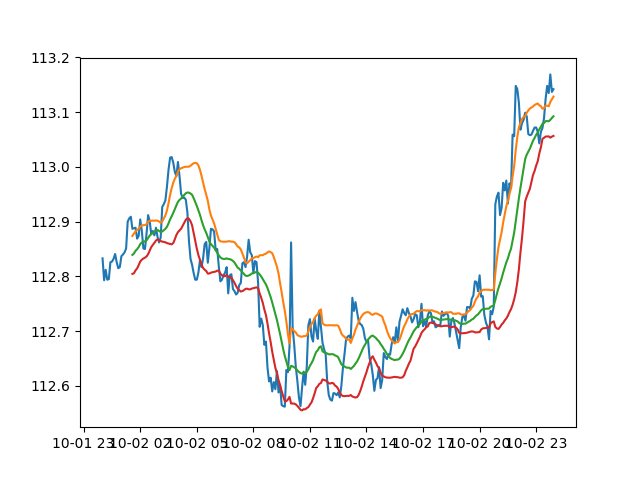

[[<matplotlib.lines.Line2D at 0x7f0c64f6bf98>],

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
data = hd.data()['Close']
x = data.index
y = data.values
sd = 1
upper, middle, lower = talib.BBANDS(data.values, timeperiod=20, matype=talib.MA_Type.SMA, nbdevup=sd, nbdevdn=sd)
[plt.plot(x, val) for val in [y, upper, middle, lower]]

In [ ]:
data.values

array([ 112.833,  112.793,  112.812,  112.794,  112.795,  112.826,
        112.827,  112.832,  112.841,  112.826,  112.815,  112.817,
        112.837,  112.84 ,  112.844,  112.851,  112.9  ,  112.906,
        112.909,  112.887,  112.888,  112.889,  112.869,  112.874,
        112.904,  112.883,  112.851,  112.85 ,  112.878,  112.912,
        112.901,  112.877,  112.883,  112.875,  112.889,  112.872,
        112.862,  112.871,  112.927,  112.932,  112.939,  112.964,
        112.995,  113.017,  113.018,  113.008,  112.991,  112.983,
        113.009,  112.983,  112.951,  112.943,  112.944,  112.94 ,
        112.917,  112.865,  112.832,  112.821,  112.806,  112.794,
        112.794,  112.807,  112.829,  112.817,  112.833,  112.859,
        112.863,  112.825,  112.852,  112.887,  112.886,  112.882,
        112.848,  112.85 ,  112.818,  112.791,  112.794,  112.802,
        112.807,  112.817,  112.769,  112.802,  112.804,  112.777,
        112.773,  112.767,  112.77 ,  112.784,  112.788,  112.

## References

- [Deep Q-LearningでFXしてみた](http://recruit.gmo.jp/engineer/jisedai/blog/deep-q-learning/)
- [slide](https://www.slideshare.net/JunichiroKatsuta/deep-qlearningfx)